In [5]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

neo.model.models["Breathing"].breathing_enabled = True

# stabilize by calculating 60 seconds
neo.fastforward(30)


Ready in 1.6 sec. Average model step in 0.0265 ms.


In [17]:
neo.analyze(["THORAX.pres", "Breathing.exp_tidal_volume", "Breathing.resp_rate", "Heart.heart_rate"])


THORAX.pres     : max   -2.53278, min   -6.28137 mmHg
Breathing.exp_tidal_volume: max    0.01614 min    0.01447
Breathing.resp_rate: max   37.55841 min   37.54355
Heart.heart_rate: max   96.34526 min   94.79277


{'THORAX.pres.max': -2.53278, 'THORAX.pres.min': -6.28137}

In [7]:
neo.fastforward(120)

Ready in 5.3 sec. Average model step in 0.0219 ms.


In [16]:
neo.get_bloodgas("AA")

{'ph': 7.400162613244164,
 'po2': 98.33862364174283,
 'pco2': 42.40606275901911,
 'hco3': 25.959979257833755,
 'be': 0.7052063462212383,
 'so2': 97.84166541340778}

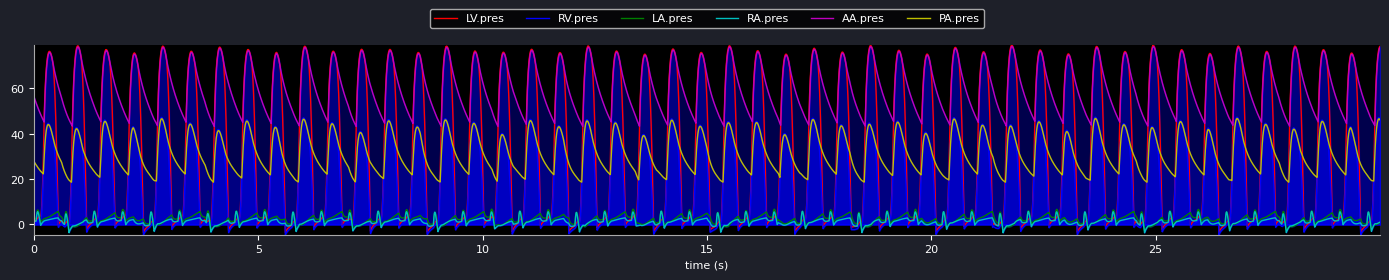


LV.pres         : max   79.00123, min   -3.56391 mmHg
RV.pres         : max   47.30876, min   -4.54586 mmHg
LA.pres         : max    6.74426, min   -2.81837 mmHg
RA.pres         : max    5.83951, min   -3.69049 mmHg
AA.pres         : max   78.49597, min   43.16155 mmHg
PA.pres         : max   46.72203, min   18.60321 mmHg


In [18]:
neo.plot_heart_pressures(time=30, analyze=True)

In [14]:
neo.model.models["Ventilator"].switch_ventilator(False)
neo.model.models["Breathing"].breathing_enabled = True

In [15]:
neo.fastforward(120)

Ready in 5.0 sec. Average model step in 0.0209 ms.
